In [793]:
import numpy as np
import pandas as pd
import os
import re
import random
import itertools
import matplotlib.pyplot as plt
import math

In [794]:
indicator=1
default='yes'

In [798]:
default=input("Would you like to use default settings? (yes/no): ")
if default=='yes':
    size=10
    mut_rate=2
    cut=math.floor(size/2)
    iter_num=3000
    conv_crit=150
else:
    while(True):
        indicator=int(input("Where Will salesman start his/her trip?\n 1) From (x=0,y=0)?\n 2) From one of the cities?\n Enter 1 or 2: "))
        if indicator==1 or indicator==2:
            break
        else:
            print('\nInvalid Input!!!\n')

    size=int(input("Enter number of cities (int): "))
    cut=int(input("Enter number of cities which cross-over is applied to (less than size)(int): "))
    mut_rate=int(input("Suppose mutation rate is [1/x]. Enter x (int): "))
    iter_num=int(input("Enter the number of iteration (int): "))
    conv_crit=int(input("Convergence criteria determines how many steps the iteration output should stay unchanged to stop?\nEnter the convergence criteria (less than number of iteration)(int): "))

Would you like to use default settings? (yes/no): yes


In [771]:
x = [random.randrange(0, 100, 1) for i in range(size)]
y = [random.randrange(0, 100, 1) for i in range(size)]

In [772]:
Columns=[i for i in range(size)]

In [773]:
print('x: ',x)
print('y: ',y)

x:  [69, 61, 94, 66, 52, 19, 64, 42, 2, 11]
y:  [20, 46, 0, 18, 19, 10, 8, 89, 42, 46]


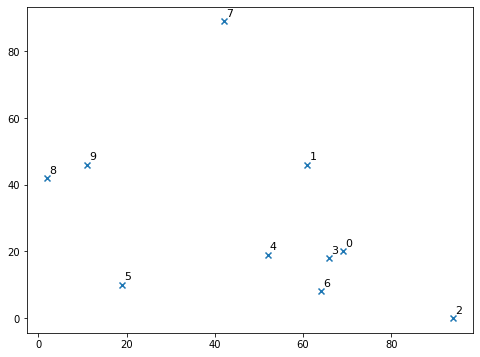

In [774]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(x, y,marker='x')

for i, txt in enumerate(Columns):
    ax.annotate(txt, (x[i]+0.5, y[i]+1.5), size=11)

In [775]:
r1=[]
r2=[]
for i in range(len(x)):
    for j in range(len(x)):
        if j==i:
            if indicator==1:
                r1.append((x[j]**2+y[j]**2)**(1/2))
            if indicator==2:
                r1.append(0)
        else:
            x_del=abs(x[i]-x[j])
            y_del=abs(y[i]-y[j])
            r1.append((x_del**2+y_del**2)**(1/2))
    r2.append(r1)
    r1=[]

In [776]:
df = pd.DataFrame(r2)

In [777]:
df

,0,1,2,3,4,5,6,7,8,9
0,71.840100,27.202941,32.015621,3.605551,17.029386,50.990195,13.000000,74.094534,70.519501,63.560994
1,27.202941,76.400262,56.612719,28.442925,28.460499,55.317267,38.118237,47.010637,59.135438,50.000000
2,32.015621,56.612719,94.000000,33.286634,46.097722,75.663730,31.048349,103.077641,101.133575,94.894678
3,3.605551,28.442925,33.286634,68.410526,14.035669,47.675990,10.198039,74.946648,68.352030,61.717096
4,17.029386,28.460499,46.097722,14.035669,55.362442,34.205263,16.278821,70.710678,55.036352,49.091751
5,50.990195,55.317267,75.663730,47.675990,34.205263,21.470911,45.044423,82.280010,36.235342,36.878178
6,13.000000,38.118237,31.048349,10.198039,16.278821,45.044423,64.498062,83.934498,70.710678,65.215029
7,74.094534,47.010637,103.077641,74.946648,70.710678,82.280010,83.934498,98.412398,61.717096,53.009433
8,70.519501,59.135438,101.133575,68.352030,55.036352,36.235342,70.710678,61.717096,42.047592,9.848858
9,63.560994,50.000000,94.894678,61.717096,49.091751,36.878178,65.215029,53.009433,9.848858,47.296934


In [778]:
path_cluster=[]
for i in range(1000):
    path_cluster.append(random.sample(Columns, len(Columns)))
random.shuffle(path_cluster)  
#path_cluster

In [779]:
def Dist_calculator(path_list):   
    dists1=[]
    dists2=[]
    dists=[]
    for path in path_list:
        for i in range(len(path)):
            if i==0:
                #print(df[path[i]][path[i]])
                dists1.append(df[path[i]][path[i]])
            else:
                #print(df[path[i]][path[i-1]])
                dists1.append(df[path[i]][path[i-1]])
        dists2.append(dists1)
        dists1=[]
        #print('--------')

    for i in range(len(dists2)):
        dists.append(sum(dists2[i]))
    
    df_path = pd.DataFrame(path_list)
    df_path['Sum'] = dists
    df_path=df_path.sort_values(by=['Sum'],ascending=True)
    df_path=df_path.reset_index(drop=True)
    return(df_path)

In [784]:
def Cross_over(df_path):
    new_breed=[]
    df_path_2=df_path.copy()
    df_path_2=df_path_2.drop(['Sum'], axis=1)
    df_list=df_path_2.values.tolist()
    #cut=math.floor(size/2)
    #cut=3
    for i in range(0,round(len(df_list)/2)):
        if (i)==(len(df_list)-1):
            continue
        else:
            A=df_list[i][:cut]
            B=df_list[i][cut:]
            C=df_list[i+1][:cut]
            D=df_list[i+1][cut:]
            
            B_new=[]
            B_ext=[]
            
            D_new=[]
            D_ext=[]
            
            
            ind=0
            ind_B_list=[]
            for j in B:
                if j not in C:
                    B_new.append(j)
                else:
                    B_new.append('X')
                    ind_B_list.append(ind)
                ind+=1
            B_ext=list(set(df_list[i])-set(C+B_new))
            random.shuffle(B_ext)
            
            l=0
            for k in ind_B_list:
                B_new[k]=B_ext[l]
                l+=1
            
            ind=0
            ind_D_list=[]
            for j in D:
                if j not in A:
                    D_new.append(j)
                else:
                    D_new.append('X')
                    ind_D_list.append(ind)
                ind+=1
            D_ext=list(set(df_list[i])-set(A+D_new))
            random.shuffle(D_ext)
            
            l=0
            for k in ind_D_list:
                D_new[k]=D_ext[l]
                l+=1
            
            new_breed.append(C+B_new)
            new_breed.append(A+D_new)
    return(new_breed)  

In [785]:
def mutation(path_list):
    path_list_mut=[]
    for path in path_list:
        path2=path.copy()
        ind=random.randrange(0, mut_rate)
        if ind==1:
            change_list=random.sample(range(0, size), 2)
            a=path2[change_list[0]]
            b=path2[change_list[1]]
            path2[change_list[0]]=b
            path2[change_list[1]]=a
            path_list_mut.append(path2)
        else:
            path_list_mut.append(path2)
    return path_list_mut  

In [786]:
path_cluster_copy=path_cluster.copy()
#path_cluster_copy

In [787]:
df_path=Dist_calculator(path_cluster_copy)

In [788]:
Min_list=[]
Mean_list=[]
converged=0
for i in range(iter_num):
    path_cluster_copy=Cross_over(df_path) 
    path_cluster_copy=mutation(path_cluster_copy)
    df_path=Dist_calculator(path_cluster_copy)
    Min_list.append(df_path.Sum[0])
    Mean_list.append(df_path['Sum'].mean())
    if i>conv_crit:
        if len(set(Min_list[-1*conv_crit:]))==1:
           print(str(i+1)+'.',df_path.Sum[0])
           converged=1       
           break            
    print(str(i+1)+'.',df_path.Sum[0])

if converged==1:
    print("Converged!")
else:
    print("Not converged!\nTry different settings...")

1. 320.1774635302017
2. 320.1774635302017
3. 330.6348706133559
4. 311.8141997431685
5. 311.8141997431685
6. 293.01452860547795
7. 263.98021337299974
8. 284.350699240246
9. 280.97957878700004
10. 257.72524889345146
11. 257.72524889345146
12. 262.2066852035994
13. 267.484210802991
14. 265.28500843981726
15. 258.1337114637627
16. 258.1337114637627
17. 258.1337114637627
18. 263.98021337299974
19. 263.98021337299974
20. 263.98021337299974
21. 263.98021337299974
22. 263.98021337299974
23. 259.74651156550664
24. 262.2066852035994
25. 259.74651156550664
26. 257.91700543894524
27. 257.72524889345146
28. 257.72524889345146
29. 257.72524889345146
30. 257.72524889345146
31. 257.72524889345146
32. 257.72524889345146
33. 257.72524889345146
34. 257.72524889345146
35. 257.72524889345146
36. 257.72524889345146
37. 257.72524889345146
38. 257.91700543894524
39. 257.91700543894524
40. 257.72524889345146
41. 257.72524889345146
42. 257.72524889345146
43. 257.72524889345146
44. 257.72524889345146
45. 257.725

In [789]:
print('Min: ',min(Min_list))
print('Cov: ',Min_list[-1])

Min:  257.72524889345146
Cov:  257.72524889345146


In [790]:
df_path.iloc[0]

0        5.000000
1        8.000000
2        9.000000
3        7.000000
4        1.000000
5        4.000000
6        3.000000
7        0.000000
8        6.000000
9        2.000000
Sum    257.725249
Name: 0, dtype: float64

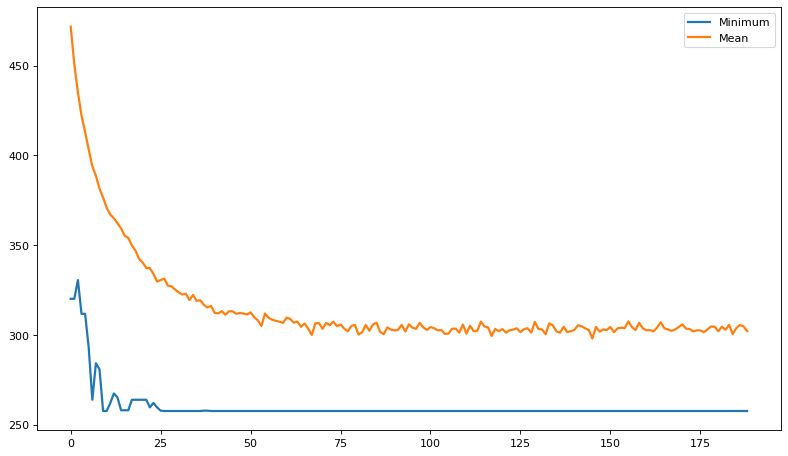

Min_value:  257.72524889345146


In [791]:
plt.figure(figsize=(12, 7), dpi=80)
lmt=len(Min_list)
x_list=[i for i in range(len(Min_list[:lmt]))]
#plt.plot(x_list, Min_list[:lmt],'-o',markersize=4,linewidth=1.5)
#plt.plot(x_list, Mean_list[:lmt],'-o',markersize=4,linewidth=1.5)
plt.plot(x_list, Min_list[:lmt],linewidth=2)
plt.plot(x_list, Mean_list[:lmt],linewidth=2)
plt.legend(['Minimum','Mean'])
plt.show()
print('Min_value: ',min(Min_list))

[5, 8, 9, 7, 1, 4, 3, 0, 6, 2]
Min:  257.72524889345146
Cov:  257.72524889345146


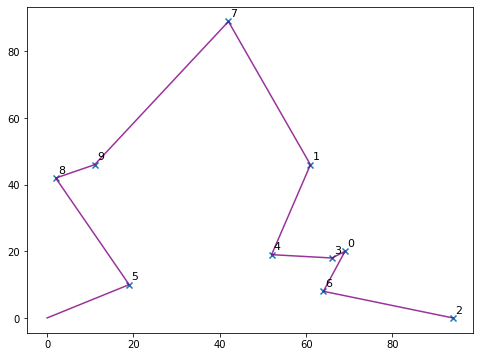

In [792]:
line=list(df_path.iloc[0])
line_rev=[]
for i in range(len(line)-1):
    line_rev.append(int(line[i]))
print(line_rev)

x_line=[0]
y_line=[0]
for i in range(len(line_rev)):   
    x_line.append(x[line_rev[i]])
    y_line.append(y[line_rev[i]])
    
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(x, y,marker='x')
ax.plot(x_line,y_line, color='purple',alpha=0.8)

for i, txt in enumerate(Columns):
    ax.annotate(txt, (x[i]+0.5, y[i]+1.5), size=11)
print('Min: ',min(Min_list))
print('Cov: ',Min_list[-1])